# 1. Melakukan Install dan Import Libraries

In [1]:
!pip install tensorflow==2.5.0 opencv-python mediapipe sklearn matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from tkinter import * 
from PIL import ImageTk, Image 
from tkinter import filedialog
import tkinter.messagebox

# 2. Mendeteksi Keypoints Menggunakan MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
   
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
   
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
     
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break 
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
    for i in range (1,5):
        cv2.waitKey(1)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
len(results.face_landmarks.landmark)

468

In [9]:
len(results.pose_landmarks.landmark)

33

In [10]:
len(results.left_hand_landmarks.landmark)

21

In [11]:
len(results.right_hand_landmarks.landmark)

21

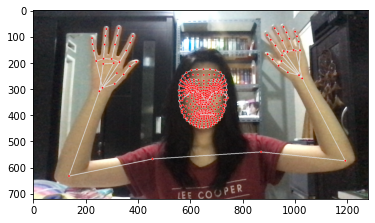

In [13]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Melakukan Proses Extract Keypoints

In [7]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [17]:
result_test = extract_keypoints(results)

In [18]:
result_test

array([ 0.51707929,  0.48764518, -0.91717499, ...,  0.17588241,
        0.14969832, -0.04368679])

# 4. Membuat Folder Untuk Dataset

In [17]:

DATA_PATH = os.path.join('MP_Data') 


actions = np.array(['halo', 'terimakasih', 'baik', 'maaf', 'saya', 
                    'siapa', 'kapan', 'dimana', 'apa', 'kenapa'])


no_sequences = 30

sequence_length = 30

In [18]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Mengumpulkan Dataset

In [54]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                # print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()
    for i in range (1,5):
        cv2.waitKey(1)

# 6. Memproses Data dan Membuat Label

In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [13]:
label_map = {label:num for num, label in enumerate(actions)}

In [14]:
label_map

{'halo': 0,
 'terimakasih': 1,
 'baik': 2,
 'maaf': 3,
 'saya': 4,
 'siapa': 5,
 'kapan': 6,
 'dimana': 7,
 'apa': 8,
 'kenapa': 9}

In [16]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [17]:
np.array(sequences).shape

(300, 30, 1662)

In [60]:
X = np.array(sequences)
y = to_categorical(labels).astype(int)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# 7. Membuat dan Melatih Model Deep Learning

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [71]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

2022-05-24 19:38:19.213724: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-05-24 19:38:19.213744: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-05-24 19:38:19.214236: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


In [72]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [73]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [75]:
model.fit(X_train, y_train, epochs=130, callbacks=[tb_callback])

Epoch 1/130
3/9 [=========>....................] - ETA: 0s - loss: 1.3266 - categorical_accuracy: 0.5938

2022-05-24 19:40:55.676427: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-05-24 19:40:55.676445: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-05-24 19:40:55.744326: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-05-24 19:40:55.754903: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-05-24 19:40:55.761356: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: Logs/train/plugins/profile/2022_05_24_19_40_55
2022-05-24 19:40:55.766194: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to Logs/train/plugins/profile/2022_05_24_19_40_55/Mettas-MacBook-Pro.local.trace.json.gz
2022-05-24 19:40:55.772210: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: Logs/train/plugins/profile/2022_05_24_19_40_55
2022-05-24 19:40:55

9/9 [==============================] - 1s 77ms/step - loss: 1.2090 - categorical_accuracy: 0.5965
Epoch 2/130
9/9 [==============================] - 1s 60ms/step - loss: 0.7794 - categorical_accuracy: 0.6842
Epoch 3/130
9/9 [==============================] - 1s 73ms/step - loss: 0.5970 - categorical_accuracy: 0.7579
Epoch 4/130
9/9 [==============================] - 1s 62ms/step - loss: 0.5801 - categorical_accuracy: 0.7123
Epoch 5/130
9/9 [==============================] - 1s 64ms/step - loss: 0.5533 - categorical_accuracy: 0.7719
Epoch 6/130
9/9 [==============================] - 1s 57ms/step - loss: 0.4820 - categorical_accuracy: 0.7825
Epoch 7/130
9/9 [==============================] - 1s 60ms/step - loss: 0.4296 - categorical_accuracy: 0.8281
Epoch 8/130
9/9 [==============================] - 1s 61ms/step - loss: 0.6676 - categorical_accuracy: 0.6912
Epoch 9/130
9/9 [==============================] - 1s 65ms/step - loss: 0.4646 - categorical_accuracy: 0.7614
Epoch 10/130
9/9 [====

In [76]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_7 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 596,906
Trainable params: 596,906
Non-trainable params: 0
________________________________________________

# 8. Membuat Prediksi 

In [77]:
res = model.predict(X_test)

In [82]:
actions[np.argmax(res[5])]

'maaf'

In [83]:
actions[np.argmax(y_test[5])]

'maaf'

# 9.  Menyimpan dan Memuat Model

In [84]:
model.save('action.h5')

In [8]:
from tensorflow import keras
model = keras.models.load_model('/Users/mettaberliana/Documents/ActionDetection/action.h5')

2022-08-29 08:04:31.091614: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.load_weights('action.h5')

# 10. Menghitung Confusion Matrix dan Accuracy

In [10]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [88]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [89]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[14,  0],
        [ 0,  1]],

       [[11,  0],
        [ 0,  4]],

       [[11,  2],
        [ 0,  2]],

       [[12,  0],
        [ 0,  3]],

       [[13,  0],
        [ 2,  0]],

       [[14,  0],
        [ 0,  1]],

       [[14,  0],
        [ 0,  1]],

       [[14,  0],
        [ 0,  1]]])

In [90]:
accuracy_score(ytrue, yhat)

0.8666666666666667

# 11. Menjalankan Aplikasi

In [10]:
root=Tk()
root.geometry('500x570')
root.resizable(width=True, height=True)
frame = Frame(root, relief=RIDGE, borderwidth=2)
frame.pack(fill=BOTH,expand=1)
root.title('Bahasa Isyarat Indonesia')
frame.config(background='skyblue3')
label = Label(frame, text="\nDeteksi Real-Time \nBahasa Isyarat Indonesia \n", bg='skyblue3', font=('Quicksand 14 bold'))
label.pack(side=TOP)
filename = PhotoImage(file='/Users/mettaberliana/Documents/ActionDetection/cover.png')
background_label = Label(frame,image=filename)
background_label.pack(side=TOP)

In [11]:
actions = np.array(['halo', 'terimakasih', 'baik', 'maaf', 'saya', 
                    'siapa', 'kapan', 'dimana', 'apa', 'kenapa'])

In [12]:
def web():
    
    sequence = []
    sentence = []
    predictions = []
    threshold = 0.5

    cap = cv2.VideoCapture(0)
# Set mediapipe model 
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        while cap.isOpened():

        # Read feed
            ret, frame = cap.read()

        # Make detections
            image, results = mediapipe_detection(frame, holistic)
            print(results)
        
        # Draw landmarks
            draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
            keypoints = extract_keypoints(results)
            sequence.append(keypoints)
            sequence = sequence[-30:]
        
            if len(sequence) == 30:
                res = model.predict(np.expand_dims(sequence, axis=0))[0]
                print(actions[np.argmax(res)])
                predictions.append(np.argmax(res))
            
            
        #3. Viz logic
                if np.unique(predictions[-10:])[0]==np.argmax(res): 
                    if res[np.argmax(res)] > threshold: 
                    
                        if len(sentence) > 0: 
                            if actions[np.argmax(res)] != sentence[-1]:
                                sentence.append(actions[np.argmax(res)])
                        else:
                            sentence.append(actions[np.argmax(res)])

                    if len(sentence) > 5: 
                        sentence = sentence[-5:]

                cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 3, cv2.LINE_AA)
        

        # Show to screen
            cv2.imshow('Detection', image)

        # Break gracefully
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
        cap.release()
        cv2.destroyAllWindows()
        for i in range (1,5):
            cv2.waitKey(1)

In [13]:
def about_app():
    tkinter.messagebox.showinfo("About Application",
                               "\n Bahasa Isyarat Indonesia merupakan sebuah aplikasi \nyang digunakan untuk mendeteksi 10 kata \ndalam Bahasa Isyarat Indonesia\n diantaranya adalah 'Apa', 'Kapan', 'Dimana',\n 'Siapa', 'Kenapa', 'Halo', 'Maaf',\n 'Saya', 'Baik', dan 'Terima Kasih'")

In [14]:
def creator():
    tkinter.messagebox.showinfo("Creator","\nMetta Berliana \n53419677 \n3IA17 \n")

In [15]:
but1=Button(frame,padx=5,pady=5,width=20,bg='white',fg='black',relief=GROOVE,command=web,text='START DETECTION',font=('helvetica 15 bold'))
but1.place(x=125,y=154)

In [16]:
but2=Button(frame,padx=5,pady=5,width=20,bg='white',fg='black',relief=GROOVE,command=about_app,text='ABOUT',font=('helvetica 15 bold'))
but2.place(x=125,y=254)

In [17]:
but3=Button(frame,padx=5,pady=5,width=20,bg='white',fg='black',relief=GROOVE,command=creator,text='CREATOR',font=('helvetica 15 bold'))
but3.place(x=125,y=354)

In [ ]:
root.mainloop()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

2022-08-29 08:04:53.716962: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
halo
<class 'mediapipe.python.solution_base.SolutionOutputs'>
halo
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutp

<class 'mediapipe.python.solution_base.SolutionOutputs'>
saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<c

<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik

<class 'mediapipe.python.solution_base.SolutionOutputs'>
kenapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
kenapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
kenapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
kenapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
kenapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
kenapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
kenapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
kenapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
kenapa
<class 'mediapipe.python.solution_base.SolutionOutpu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.S

<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.S

<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
saya
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa

<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
siapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class

<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class 'mediapipe.python.solution_base.SolutionOutputs'>
baik
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
kenapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
kenapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
kenapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
kenapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
kenapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
kenapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
kenapa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
kenapa
<class 'mediapipe.python.solution_base.SolutionOutputs

<class 'mediapipe.python.solution_base.SolutionOutputs'>
apa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apa
<class 'mediapipe.python.solution_base.SolutionOutputs'>
apa
<class 'mediapipe.python

<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
maaf
<class '

halo
<class 'mediapipe.python.solution_base.SolutionOutputs'>
halo
<class 'mediapipe.python.solution_base.SolutionOutputs'>
halo
<class 'mediapipe.python.solution_base.SolutionOutputs'>
halo
<class 'mediapipe.python.solution_base.SolutionOutputs'>
halo
<class 'mediapipe.python.solution_base.SolutionOutputs'>
halo
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.SolutionOutputs'>
dimana
<class 'mediapipe.python.solution_base.Soluti

2022-08-29 10:19:06.186 python[21353:2011059] Warning: Expected min height of view: (<NSButton: 0x7f951e245b20>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-08-29 10:19:13.643 python[21353:2011059] Warning: Expected min height of view: (<NSButton: 0x7f951e242000>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-08-29 10:19:14.280 python[21353:2011059] Warning: Expected min height of view: (<NSButton: 0x7f952c28c170>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-08-29 10:19:19.393 python[21353:2011059] Warning: Expected min height of view: (<NSButton: 0x7f952c2aece0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-08-29 10:19:19.966 python[21353:2011059] Warning: Expected min height of view: 